Cleaning from output csv

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
df = pd.read_csv("song_tracking_table.csv", sep="\t", low_memory=False)
del df["Unnamed: 0"]
df = df.drop(df.index[0])
df.head()

,$$$ - with Matt Ox,'Till I Collapse,(Don't Fear) The Reaper,(Fuck A) Silver Lining,(I Can't Get No) Satisfaction - Mono Version / Remastered 2002,(Intro) I'm so Grateful,(Not) The One,(What A) Wonderful World - Remastered,...Baby One More Time - Recorded at Spotify Studios NYC,...Ready For It?,...,rockstar,santa monica & la brea,schizophrenia,she ready,the remedy for a broken heart (why am I so in love),top priority (with Ne-Yo),up in this (with Tinashe),wokeuplikethis*,Échame La Culpa,美女と野獣
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Counts the number of days that a song has been on the top 200 since the start data or our data and stores the data in a new data frame

In [40]:
top_songs = []
for column in df:
    #print(app)
    app = 0
    for d in df[column]:
        d = float(d)
        if not math.isnan(d):
            app = app + 1
    top_songs.append((app, column))
top_songs = sorted(top_songs, reverse=True)

songs = []
days = []
for song in top_songs:
    songs.append(song[1])
    days.append(song[0])
top_df = pd.DataFrame()

top_df["days_on_top_200"] = days
top_df["days_on_top_200"] = top_df[ top_df["days_on_top_200"] > 0 ]
top_df["song"] = artists
top_df.to_csv("days_on_top_200.csv", sep="\t")
top_df.head(10)

,days_on_top_200,song
0,477.0,goosebumps
1,477.0,White Iverson
2,477.0,Redbone
3,477.0,Go Flex
4,477.0,Congratulations
5,476.0,Location
6,475.0,No Role Modelz
7,473.0,iSpy (feat. Lil Yachty)
8,472.0,Shape of You
9,466.0,Bounce Back


histogram of the number of days that a song was on the top 200 chart

In [46]:
#time_on_chart = top_df["days_on_top_200"].hist(bins=200)

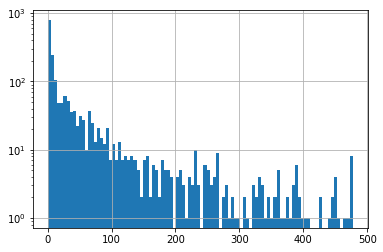

In [43]:
time_on_chart = top_df["days_on_top_200"].hist(log=True, bins=100)

Formatting songs to graph their life on the top 200 list

In [47]:
tracking = {}
top_40 = top_songs[:6]

for song in top_40:
    history = []
    song = song[1]
    for d in df[song]:
        d = float(d)
        if not math.isnan(d):
            history.append(d)
        else:
            history.append(201)
    tracking[song] = history


track_df = pd.DataFrame(tracking)

shows the trajectory of the 6 songs with the longest time spent on the top 200

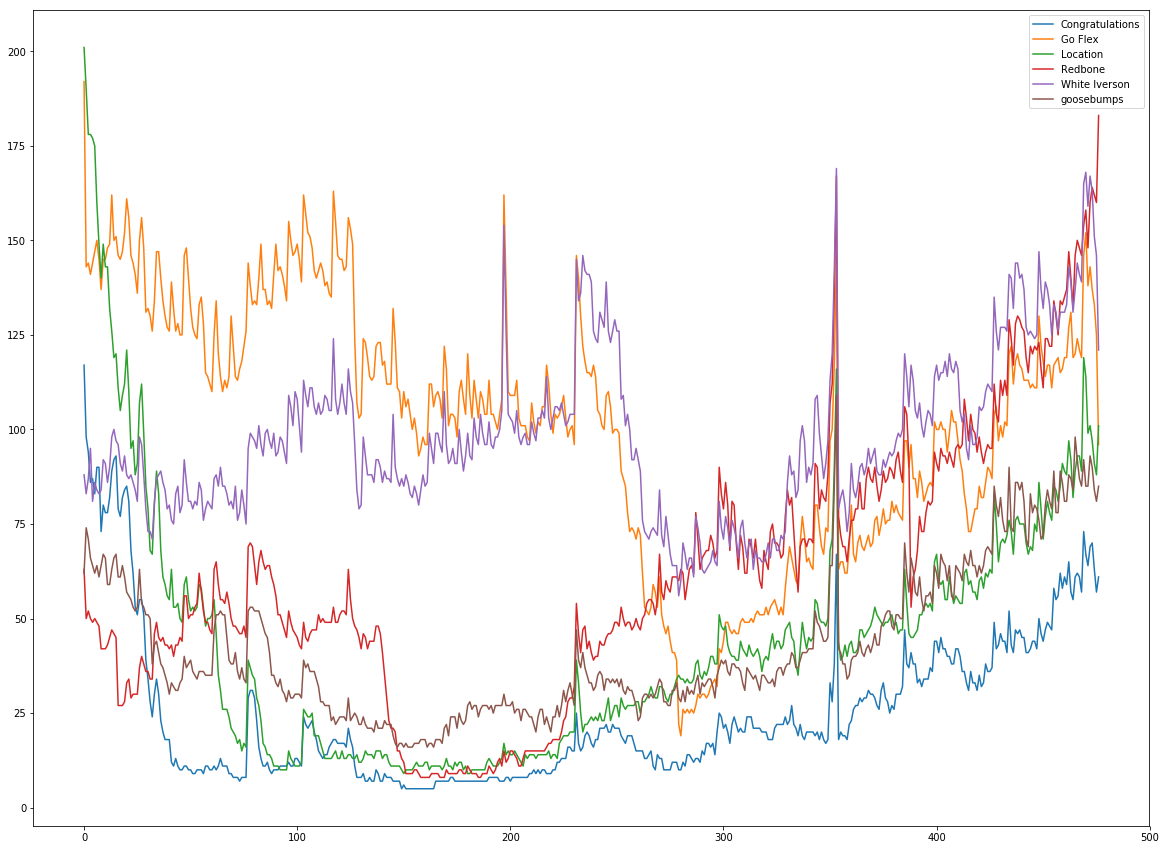

In [49]:
for song in track_df:
    track_df[song].plot(legend=True, figsize=(20,15))